### FLOW SHOP Library
calculate_time  
makespan  
gantt  
plot_gantt  
palmer  
algoritmo_01  
algoritmo_02  
problem_df  
swap  

In [18]:
#fonte: https://plot.ly/python/gantt/
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#Arquivos online
#http://people.brunel.ac.uk/~mastjjb/jeb/orlib/flowshopinfo.html


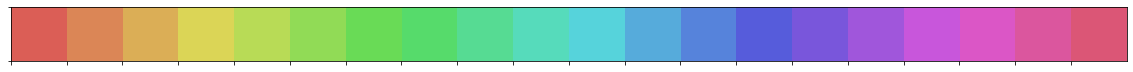

In [50]:
import seaborn as sns
sns.color_palette("Set1", n_colors=20)
sns.palplot(sns.color_palette("hls", 20))

In [51]:
#Exercício 
#algoritmo 01 Busca Sequencial sem reinício assume solução * se for melhor e se torna base
#algoritmo 02 Busca Sequencial com reinício assume solução * se for melhor e se torna base
#Saída melhor solução, makespan, Soluções Testadas e Melhorias Obtidas
#passar como entrada a sequencia inicial
#Quais melhorias podem ser implementadas no algoritmo de sequenciamento

#Example dictionary
#4 tasks, 3 machine
#Each tasks contains 2 attributes, name and a vector which represents processing time for each machine
#Each machine contais 2 atributes, name and start_time
dict_problem = { 'Tasks': [],
                 'Machines': []}
import numpy as np
from datetime import datetime, timedelta
import math

class FlowShopPermutational():
    
    def __init__(self, num_tasks, num_machines, processing_time, free_time, scheduling):
        self.task_quantity = num_tasks
        self.machine_quantity = num_machines
        #print(free_time)
        if len(free_time)!=num_machines:
            raise 'Free time dimension is different of the number of machines.'
        self.start_time = free_time.copy()
        if processing_time.shape != (num_tasks, num_machines):
            raise 'Wrong procession time dimension.'
        self.job_processing_time = processing_time.copy()
        if len(scheduling)!= num_tasks:
            raise 'Wrong scheduling dimension'
        for i in range(1,num_tasks+1):
            if i not in scheduling:
                raise 'Wrong Scheduling.  Some operations not scheduled.'
        self.job_scheduling = scheduling.copy()
        #start time for operations initialized with zeros
        self.job_start_time = np.zeros((self.task_quantity,self.machine_quantity))
        #start time for operations initialized with zeros                               
        self.job_end_time = np.zeros((self.task_quantity,self.machine_quantity))
        #Calculate Start Time and End Time for each Task in each Machine based in scheduling
        #Calculate makespan and completion time optimization function
        self.calculate_time()
        #optimization functions start with max float number
        #self.completion_time = np.finfo(float).max
        #self.makespan = np.finfo(float).max
        #tasks name if not informed number order
        #if task_name=='':
        #    self.task_name = [ "Task{:03d}".format(i) for i in range(1,self.task_quantity+1)]
        #else:
        #    self.task_name = task_name
        #machine name if not informed number order
        #if machine_name=='':
        #    self.machine_name = [ "Machine{:03d}".format(i) for i in range(1,self.machine_quantity+1)]
        #else:
        #    self.machine_name = machine_name
        #reference time if not informed now is considered
        #if reference_time == '':
        #    self.reference_time = datetime.now()
        #else:
        #    self.reference_time = reference_time
        #time unit if not informed min is considered
        
    def to_dataframe(self, reference_time = datetime.now()):
        from datetime import datetime,timedelta
        task_name = [ "Task{:03d}".format(i) for i in range(1,self.task_quantity+1)]
        machine_name = [ "Machine{:03d}".format(i) for i in range(1,self.machine_quantity+1)]
        dict_df = {'Task':[],'Machine':[],'Start':[],'Finish':[]}
        for task in range(self.task_quantity):
            for machine in range(self.machine_quantity):
                dict_df['Task'].append(task_name[task])
                dict_df['Machine'].append(machine_name[machine])
                dict_df['Start'].append((reference_time + timedelta(minutes=self.job_start_time[task,machine])))#.strftime("%Y-%m-%d %H:%M:%S")
                dict_df['Finish'].append((reference_time + timedelta(minutes=self.job_end_time[task,machine])))#.strftime("%Y-%m-%d %H:%M:%S")
        self.df = pd.DataFrame(dict_df)
        return self.df.copy()

    #def to_dict(self):
    #    self.dict['Number of Tasks'] = self.task_quantity
    #    self.dict['Number of Machines'] = self.machine_quantity
    #    self.dict['Order'] = self.job_scheduling
    #    self.dict['Completion Time'] = self.completion_time
    #    self.dict['Machines']=[{} for i in range(self.machine_quantity)]
    #    for machine in range(self.machine_quantity):
    #        self.dict['Machines'][machine]['name'] = 'Machine_' + str(machine)
    #        self.dict['Machines'][machine]['start_time'] = self.start_time[machine]
    #    self.dict['Tasks'] = [{} for i in range(self.task_quantity)]
    #    for task in range(self.task_quantity):
    #        self.dict['Tasks'][task]['name'] = 'Task_'+str(task)
    #        self.dict['Tasks'][task]['Machines'] = []
    #        for machine in range(self.machine_quantity):
    #            dict_task = {}
    #            dict_task[self.dict['Machines'][machine]['name']] = {}
    #            dict_task[self.dict['Machines'][machine]['name']]['Start'] = self.job_start_time[task][machine]
    #            dict_task[self.dict['Machines'][machine]['name']]['End'] = self.job_end_time[task][machine]
    #            dict_task[self.dict['Machines'][machine]['name']]['Processing Time'] = self.job_processing_time[task][machine]
    #            self.dict['Tasks'][task]['Machines'].append(dict_task)
    #    return self.dict
    #
        
    def calculate_time(self):
        #start_time and end_time is initialized with zeros
        self.job_start_time = np.zeros((self.task_quantity,self.machine_quantity))                           
        self.job_end_time = np.zeros((self.task_quantity,self.machine_quantity))        
        #print(self.job_scheduling)
        free_time = self.start_time.copy()
        #print('free_time:',free_time)
        for ind_o,order in enumerate(self.job_scheduling-1):        
            for machine in range(self.machine_quantity):
                #print('índice:',ind_o,'ordem:',order,'Máquina:',machine)
                #Calcular data de início
                #Se é primeira máquina, aloca no tempo disponível da máquina
                #Caso contrário maior entre tempo disponível e término da operação na máquina anterior
                if machine==0:
                    #print("Operação:",order,"Máquina:",machine, 'Start Time:',free_time[machine])
                    self.job_start_time[order,machine] = free_time[machine]
                else:
                    self.job_start_time[order,machine] = max(free_time[machine],self.job_end_time[order,machine-1])
                    #print("Operação:",order,"Máquina:",machine, 'Start Time:',self.job_start_time[order,machine])
                    
                #Atualiza as datas de término da ordem na máquina
                self.job_end_time[order,machine] = self.job_start_time[order,machine] + self.job_processing_time[order,machine]
                #print("Operação:",order,"Máquina:",machine, 'End Time:',self.job_end_time[order,machine])
                
                #Atualiza free_time
                free_time[machine] = self.job_end_time[order,machine]
        self.makespan = max(free_time)
        self.completion_time = sum(free_time)
 
    def Palmer(self):
        #Develop a slope index Si for each task based in processing time
        #Assume that #m is number of machines and Pjm is the processing time for task j at machine m
        #Si = (#m-1)*P[j,m] + (#m-3)*P[j,m-1] + ... - (#m-3)*P[j,2] - (#m-1)*P[j,1]
        #Example: If #m = 4 then
        #Si = 3*P[j,4] + 1*P[j,3]-1*P[j,2]-3*P[j,1]
        #Otherwise, a odd number is given by 2*n-1, in the first coefficiente we have #m - 1 or #m - the first odd
        #the second coefficient is #m - the second odd, and so.  Then we have #m - (2*n-1) or #m - 2*n + 1.
        #But n is machine dependent, the last is the first, the penult is the second, or n = #m + 1 - machine.
        #Replacing this value we have #m - 2*(#m + 1 - machine) + 1
        #Rearranging #m - 2*#m -2 + 2*machine + 1
        #Rearranging 2*machine - #m - 1
        #Then the equation for Si based on machine and #m is
        #Si = sum((2*machine - #m - 1)*P[j,machine])
        #For use in base zero vectors, the position is given by M = machine - 1, or machine = M + 1
        #Sim = sum((2*(M+1)-#m - 1)*P[j,M])
        #SiM = sum((2*M -#m + 1)*P[j,M])
        #operation weight w        
        w = np.array([ 2*i-self.machine_quantity+1 for i in range(self.machine_quantity)])
        #Si calculus
        SiM = w*self.job_processing_time
        Si = SiM.sum(axis=1)
        #Find the values order, for example [3,12,-6, 4], the order is [2,0,3,1]
        order = Si.argsort()
        #The scheduling order is the reverse
        self.job_scheduling = order[::-1] + 1
        return self.job_scheduling.copy()
        #palmer['order'] = palmer.score.rank(method='first', ascending=False)
        #return self.scheduling+1

        
    def generate_random(self, sim = 1):
        simulation = {'Scheduling':[],'Makespan':[]}
        for i in range(sim):
            self.random_scheduling()
            self.calculate_time()
            simulation['Scheduling'].append(self.job_scheduling)
            simulation['Makespan'].append(self.makespan)
        return simulation
    
class SolveFlowShop():
    def __init__(self):
        np.random.seed(123)
        self.list_problems = []
        self.problem_template = {'Name':'','Number of Tasks':0,'Number of Machines':0, 'Processing Time':[], 
                                'Start Time':[],'End Time':[], 'Free Time':[],'Scheduling':[], 'Objective Function': {}, 
                                 'Method':'', 'Flow Shop Object': ''}
        
    def plot_by_job(self, dict_problem, title = '', sort = True):  
        import seaborn as sns
        #https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python
        #https://seaborn.pydata.org/generated/seaborn.color_palette.html
        #c1='#1f77b4' #blue
        #c2='green' #green
        #c1=np.array(mpl.colors.to_rgb(c1))
        #c2=np.array(mpl.colors.to_rgb(c2))
        nm = dict_problem['Number of Machines']
        #colors = [mpl.colors.to_hex((1-mix/nm)*c1 + mix/nm*c2) for mix in range(nm)]
        colors = sns.color_palette("hls", n_colors=nm)
        df = dict_problem['Flow Shop Object'].to_dataframe()
        df = df.sort_values(by='Start')
        fig = ff.create_gantt(df, index_col='Machine',
                     show_colorbar=True, showgrid_x=True, showgrid_y=True, group_tasks=True
                   ,bar_width=0.1, colors =  colors)
        fig.update_layout(
           title={
               'text': title + ' Makespan: {:.2f}'.format(dict_problem['Objective Function']['Makespan']) + \
               ' Scheduling:' + str(dict_problem['Scheduling']),
               'y':0.95,
               'x':0.5,
               'xanchor': 'center',
               'yanchor': 'top', 'font.size':24})        
        fig.show()
        
    def plot_by_machine(self, dict_problem, title = '', sort = True):  
        import seaborn as sns
        #https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python
        #https://seaborn.pydata.org/generated/seaborn.color_palette.html
        #c1='#1f77b4' #blue
        #c2='green' #green
        #c1=np.array(mpl.colors.to_rgb(c1))
        #c2=np.array(mpl.colors.to_rgb(c2))
        nt = dict_problem['Number of Tasks']
        #colors = [mpl.colors.to_hex((1-mix/nm)*c1 + mix/nm*c2) for mix in range(nm)]
        colors = sns.color_palette("hls", n_colors=nt)
        df = dict_problem['Flow Shop Object'].to_dataframe()
        df = df.sort_values(by='Start')
        df.columns = [ 'Machine', 'Task','Start', 'Finish']
        fig = ff.create_gantt(df, index_col='Machine',
                     show_colorbar=True, showgrid_x=True, showgrid_y=True, group_tasks=True
                   ,bar_width=0.1, colors =  colors)
        fig.update_layout(
           title={
               'text': title + ' Makespan: {:.2f}'.format(dict_problem['Objective Function']['Makespan']) + \
               ' Scheduling:' + str(dict_problem['Scheduling']),
               'y':0.95,
               'x':0.5,
               'xanchor': 'center',
               'yanchor': 'top', 'font.size':24})        
        fig.show()
        
        
        
    def from_csv(self, filepath):
        """
        Funtion csv_to_problem
        Load a file to problem structure
        arguments
        filepath: path and filename
        File Format
        tasks quantity
        machines quantity
        machines start time ; separated
        task one processing time ; separated
        task two processing time ; separated
        ...
        task n processing time ; separated
        """        
        file = open(filepath, 'r')        
        nt = int(file.readline())
        nm = int(file.readline())
        ft = file.readline()
        ft = np.array([float(x) for x in ft.split(';')])
        pt = []
        for i in range(nt):
            pt_aux = file.readline()
            pt_aux = [float(x) for x in pt_aux.split(';')]
            pt.append(pt_aux)
        pt = np.array(pt)
        dict_problem = self.problem_template.copy()
        dict_problem['Name'] = 'Name{:08d}'.format(np.random.randint(10**8))
        dict_problem['Number of Tasks'] = nt        
        dict_problem['Number of Machines'] = nm
        dict_problem['Free Time'] = ft 
        dict_problem['Processing Time'] = pt
        dict_problem['Scheduling'] = np.random.permutation(nt)+1
        #create a flow shop object
        Obj_flow = FlowShopPermutational(nt, nm, dict_problem['Processing Time'], 
                                         dict_problem['Free Time'], dict_problem['Scheduling'])
        dict_problem['Start Time'] = Obj_flow.job_start_time.copy()
        dict_problem['End Time'] = Obj_flow.job_end_time.copy()
        dict_problem['Objective Function']['Makespan'] = Obj_flow.makespan
        dict_problem['Objective Function']['Completion Time'] = Obj_flow.completion_time
        dict_problem['Method'] = 'Manual'
        dict_problem['Flow Shop Object'] = Obj_flow
        return dict_problem
        
    def generate_problem(self, name = '', number_of_tasks = 4, number_of_machines = 3, 
                                processing_time='', free_time='', scheduling=''):
        """
        Function: generate a flow shop permutation random problem
        Parameters:
            name: a problem's name, if not informed a ten number generated
            number_of_tasks: number of tasks for the problem
                if not informed use 4            
            number_of_machines number of machines or resources
                if not informed use 3            
            processing_time: task time duration at a specific machine
                if empty use a random between (1,100)
                if tuple with (low, high) generate processing type between this values
                if informed, format is a matrix with dimension number of tasks x number of machines
            free_time start time for each machine
                if empty use 0 for each machine
            scheduling tasks sequencing
                if empty use a random permutation               
        """
        nt = number_of_tasks
        nm = number_of_machines
        dict_problem = self.problem_template.copy()
        dict_problem['Name'] = 'Name{:08d}'.format(np.random.randint(10**8))
        dict_problem['Number of Tasks'] = number_of_tasks        
        dict_problem['Number of Machines'] = number_of_machines
        if processing_time == '':
            dict_problem['Processing Time'] = np.random.randint(1,100,nt*nm).reshape(nt,nm)
        elif type(processing_time)==type(tuple()):
            pt = processing_time
            dict_problem['Processing Time'] = np.random.randint(pt[0],pt[1],nt*nm).reshape(nt,nm)
        else:
            dict_problem['Processing Time'] = processing_time
        if free_time=='':
            dict_problem['Free Time'] = np.zeros(nm)
        else:
            dict_problem['Free Time'] = free_time
        print(free_time)
        if scheduling == '':
            dict_problem['Scheduling'] = np.random.permutation(nt)+1
        else:
            dict_problem['Scheduling'] = scheduling
        #create a flow shop object
        Obj_flow = FlowShopPermutational(nt, nm, dict_problem['Processing Time'], 
                                         dict_problem['Free Time'], dict_problem['Scheduling'])
        dict_problem['Start Time'] = Obj_flow.job_start_time.copy()
        dict_problem['End Time'] = Obj_flow.job_end_time.copy()
        dict_problem['Objective Function']['Makespan'] = Obj_flow.makespan
        dict_problem['Objective Function']['Completion Time'] = Obj_flow.completion_time
        dict_problem['Method'] = 'Manual'
        dict_problem['Flow Shop Object'] = Obj_flow
        return dict_problem
    
    def PalmerSolution(self, dict_problem):
        dict_problem['Scheduling'] = dict_problem['Flow Shop Object'].Palmer()
        dict_problem['Flow Shop Object'].calculate_time()
        dict_problem['Start Time'] = dict_problem['Flow Shop Object'].job_start_time.copy()
        dict_problem['End Time'] = dict_problem['Flow Shop Object'].job_end_time.copy()
        dict_problem['Objective Function']['Makespan'] = dict_problem['Flow Shop Object'].makespan
        dict_problem['Objective Function']['Completion Time'] = dict_problem['Flow Shop Object'].completion_time
        dict_problem['Method'] = 'Palmer'
        return dict_problem
    
    def BruteForce(self, dict_problem, objective = 'makespan'):
        from itertools import permutations
        map_objective = {'makespan':'Makespan','comptime':'Completion Time'}
        obj_flow = dict_problem['Flow Shop Object']
        best_scheduling = dict_problem['Scheduling'].copy()
        best_value = dict_problem['Objective Function'][map_objective[objective]]
        start_time = datetime.now()
        print(start_time)
        num_iterations = math.factorial(len(best_scheduling))        
        #list_perm = list(permutations(best_scheduling))
        cont = 0
        for perm in permutations(best_scheduling):
            obj_flow.job_scheduling = np.array(perm)
            obj_flow.calculate_time()
            cur_value = obj_flow.makespan if objective == 'makespan' else obj_flow.completion_time
            if cur_value < best_value:
                best_value = cur_value
                best_scheduling = obj_flow.job_scheduling.copy()
            cont+=1
        duration = datetime.now() - start_time
        print('Duração:',duration.total_seconds())
        print('Iterações:', cont)
        print('Iterações / s', cont / duration.total_seconds())
        obj_flow.job_scheduling = best_scheduling
        obj_flow.calculate_time()
        dict_problem['Scheduling'] = best_scheduling 
        dict_problem['Start Time'] = dict_problem['Flow Shop Object'].job_start_time.copy()
        dict_problem['End Time'] = dict_problem['Flow Shop Object'].job_end_time.copy()
        dict_problem['Objective Function']['Makespan'] = dict_problem['Flow Shop Object'].makespan
        dict_problem['Objective Function']['Completion Time'] = dict_problem['Flow Shop Object'].completion_time
        dict_problem['Method'] = 'Brute Force'
        return dict_problem
    
    def Simulate(self, dict_problem, objective = 'makespan', population = 50):
        dict_solutions = {'Scheduling':[], 'Objective':[]}
        obj_flow = dict_problem['Flow Shop Object']
        #generate population simulations
        for i in range(population):
            obj_flow.job_scheduling = np.random.permutation(dict_problem['Number of Tasks'])+1
            obj_flow.calculate_time()
            dict_solutions['Scheduling'].append(obj_flow.job_scheduling.copy())
            dict_solutions['Objective'].append(obj_flow.makespan)
        df = pd.DataFrame(dict_solutions)
        return df
    
    #def DispatchRuleBasedTOC(self, dict_problem, objective = 'makespan')
    
    def NeighborBest(self, dict_problem, scheduling = '', objective = 'makespan'):
        obj_flow = dict_problem['Flow Shop Object']
        if scheduling == '':
            scheduling = dict_problem['Scheduling']
        #print('scheduling', scheduling)
        obj_flow.job_scheduling = scheduling
        obj_flow.calculate_time()
        makespan = obj_flow.makespan                
        nt = dict_problem['Number of Tasks']
        nm = dict_problem['Number of Machines']
        scheduling_aux = np.copy(scheduling)
        flag = True
        while flag:
            dict_neigh = self.NeighborSearch(dict_problem, scheduling = scheduling_aux)
            print('Current makespan:',makespan)
            print(dict_neigh)
            if dict_neigh['makespan'] < makespan:
                scheduling_aux = np.copy(dict_neigh['schedule'])
                makespan = dict_neigh['makespan']
            else:
                flag = False
        print('Makespan: {}, Sequencia:{}'.format(scheduling_aux, makespan))
        obj_flow.job_scheduling = scheduling_aux
        dict_problem['Scheduling'] = scheduling_aux
        dict_problem['Flow Shop Object'].calculate_time()
        dict_problem['Start Time'] = dict_problem['Flow Shop Object'].job_start_time.copy()
        dict_problem['End Time'] = dict_problem['Flow Shop Object'].job_end_time.copy()
        dict_problem['Objective Function']['Makespan'] = dict_problem['Flow Shop Object'].makespan
        dict_problem['Objective Function']['Completion Time'] = dict_problem['Flow Shop Object'].completion_time
        dict_problem['Method'] = 'NeighborBest'
        return dict_problem
        #return scheduling_aux
        
    
    def NeighborSearch(self, dict_problem, scheduling = '', objective = 'makespan', ):
        obj_flow = dict_problem['Flow Shop Object']
        if scheduling == '':
            scheduling = dict_problem['Scheduling']
        #print('scheduling', scheduling)
        obj_flow.job_scheduling = scheduling
        obj_flow.calculate_time()
        makespan = obj_flow.makespan                
        nt = dict_problem['Number of Tasks']
        nm = dict_problem['Number of Machines']
        troca = [1,1]
        scheduling_best = np.copy(scheduling)        
        for i in range(nt-1):
            for j in range(i+1,nt):                
                scheduling_aux = np.copy(scheduling)
                #print('Scheduling Aux:',scheduling_aux)
                scheduling_aux[i] = scheduling[j]
                scheduling_aux[j] = scheduling[i]
                obj_flow.job_scheduling = np.copy(scheduling_aux)
                obj_flow.calculate_time()
                if obj_flow.makespan < makespan:
                    scheduling_best = np.copy(scheduling_aux)
                    makespan = obj_flow.makespan
                    troca = [i,j]
                #print('Scheduling Troca {} com {}: {} makespan {}'.format(i,j,scheduling_aux,obj_flow.makespan))
                #print('Scheduling Best {}: {} makespan {}'.format(troca,scheduling_best,makespan))            
            #print('Scheduling Best {}: {} makespan {}'.format(troca,scheduling_best,makespan))            
        dict_sol = {'schedule':scheduling_best, 'swap':troca, 'makespan':makespan}
        return dict_sol
    
    def DecisionTree(self, dict_problem, objective = 'makespan', population = 50, iterations = 10):
        #Prepair structured informations 
        nt = dict_problem['Number of Tasks']
        nm = dict_problem['Number of Machines']
        pt = dict_problem['Processing Time']
        domain = np.array([ [i for i in range(1, nt+1)] for i in range(nt)])
        #Generate random population
        obj_flow = dict_problem['Flow Shop Object']
        for iteration in range(iterations):
            #print('Initial',domain)
            df = pd.DataFrame(columns = ['t'+str(i) for i in range(1,nt+1)]+['makespan'])
            for i in range(population):
                #print(dir())
                #print('domain antes chamda scheduling:',domain)
                scheduling_temp = self.random_domain_scheduling(domain)
                scheduling_temp = self.NeighborBest(dict_problem, scheduling_temp)
                obj_flow.job_scheduling = scheduling_temp                
                #print('domain após chamada scheduling:',domain)
                obj_flow.calculate_time()
                df.loc[i] = [ np.where(obj_flow.job_scheduling==[i])[0][0]+1 for i in range(1,10)] + [obj_flow.makespan]
                #display(df)
            df = df.sort_values(by='makespan')
            quantile = list(df.makespan.quantile([.50]))
            df['class'] = df['makespan'].map(lambda x: 0 if x < quantile[0] else 1)
            #display(df)
            dt = problem.generate_tree(df)            
            domain = problem.restrict_domain(dt, domain)
        #print('Final:',domain)        
        return df
    
    def random_domain_scheduling(self,domain):
        schedule_domain = np.copy(domain)
        #print(dir())
        #print('Func random Domain Antes:',schedule_domain)
        nt = len(schedule_domain)
        sc = np.zeros(nt).astype(int)
        for i in range(nt):
            #select more restrive task
            o = np.count_nonzero(schedule_domain,axis=1)
            #print(o)
            #select task to scheduling
            t = np.where( o == o.min())[0][0]
            #print(t)
            #select domain for this task
            values = [schedule_domain[t,j] for j in range(nt) if schedule_domain[t,j]>0 ]
            #print(values)
            #select random value
            sc[t] = np.random.choice(values)
            #eliminate for other tasks this position
            schedule_domain[:,sc[t]-1]=0
            #update task 
            schedule_domain[t,:]=nt+1
        #print('Depois:',schedule_domain)
       # print('Scheduling',sc)
        #print(dir())
        return sc
    
    def restrict_domain(self, decision_tree, domain):
        initial_domain = np.copy(domain)
        #print('Func restrict',initial_domain)
        left = decision_tree.tree_.children_left
        right = decision_tree.tree_.children_right
        feature = decision_tree.tree_.feature
        threshold = decision_tree.tree_.threshold
        value = decision_tree.tree_.value
        samples = sum(value[0][0])
        odd = np.array(list(map(lambda x: x[0][0]/(sum(x[0][1:])+1),value)))
        sam_sub = np.array(list(map(lambda x: sum(x[0])/samples,value)))
        of = odd*sam_sub
        order = of.argsort()
        node = np.array([order[-1]] if order[-1]!=0 else [order[-2]])
        #node = np.where(of == of.max())[0]
        #print(of, node)
        while len(node) > 0:
            #Verifica se é esquerda de alguém
            node_left = np.where(left == node[0])[0]
            #Verifica se é direita de alguém
            node_right = np.where(right == node[0])[0]
            if len(node_left)>0:
                #Se é esquerda de alguém então <=
                node = node_left
                task = feature[node[0]]
                limit = int(threshold[node[0]])
                print('Aplicando ', task, '<=', limit)
                initial_domain[task,limit:] = 0
            elif len(node_right)>0:
                #Se é direita de alguém então >= 
                node = node_right
                task = feature[node[0]]
                limit = int(threshold[node[0]])
                print('Aplicando ', task, '>', limit)
                initial_domain[task,:limit] = 0
            else:
                node = np.array([])
            print(initial_domain)
        return initial_domain

    def generate_tree(self, df):
        import numpy as np
        import matplotlib.pyplot as plt
        #https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
        #https://github.com/nok/sklearn-porter
        from sklearn.datasets import load_iris
        from sklearn.tree import DecisionTreeClassifier, plot_tree
        feature_names = df_all.columns[:-2]
        X = df.iloc[:,:-2].values
        y = df.iloc[:,-1].values
        clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
        plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
        plt.figure(figsize=(15,15))
        plot_tree(clf, filled=True, feature_names = feature_names, class_names=['P50','P100'])
        plt.show()
        return clf

        

In [36]:
df = dict_01['Flow Shop Object'].to_dataframe()
df.columns

Index(['Task', 'Machine', 'Start', 'Finish'], dtype='object')

In [58]:
pt = np.array([[3, 3, 7, 2],
        [4, 7, 2, 1],
        [2, 1, 1, 4],
        [5, 1, 1, 5],
        [2, 8, 4, 3],
        [5, 8, 3, 5],
        [9, 1, 8, 4],
        [5, 7, 2, 6],
        [7, 3, 2, 9]])
sc = np.array([3, 5, 9, 1, 8, 6, 4, 7, 2])
problem = SolveFlowShop()
dict_01=problem.from_csv('ExemploFSP2.txt')
dict_01 = problem.NeighborBest(dict_01, scheduling = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))
#problem.plot_by_job(dict_01)
problem.plot_by_machine(dict_01)
#dict_01['Processing Time'].sum(axis=0)

#domain = np.array([ [i for i in range(1, nt+1)] for i in range(nt)])
#dict_01 = problem.generate_problem(number_of_tasks = 9, number_of_machines = 4, processing_time= pt, scheduling = sc )
#df = problem.DecisionTree(dict_01, population=50, iterations = 10)
#dict_01['Flow Shop Object'].job_scheduling = sc
#dict_01['Flow Shop Object'].calculate_time()
#print(dict_01['Flow Shop Object'].makespan)
#df.iloc[0][:]

#dt = problem.generate_tree(df)
#print('Global',domain)
#problem.restrict_domain(dt, domain)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:387: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:421: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Current makespan: 349.0
{'schedule': array([10,  2,  3,  4,  5,  6,  7,  8,  9,  1, 11, 12, 13, 14, 15, 16, 17,
       18]), 'swap': [0, 9], 'makespan': 339.0}
Current makespan: 339.0
{'schedule': array([10,  2,  3,  4,  5,  6,  7, 13,  9,  1, 11, 12,  8, 14, 15, 16, 17,
       18]), 'swap': [7, 12], 'makespan': 321.0}
Current makespan: 321.0
{'schedule': array([10,  2,  3, 17,  5,  6,  7, 13,  9,  1, 11, 12,  8, 14, 15, 16,  4,
       18]), 'swap': [3, 16], 'makespan': 315.0}
Current makespan: 315.0
{'schedule': array([ 2, 10,  3, 17,  5,  6,  7, 13,  9,  1, 11, 12,  8, 14, 15, 16,  4,
       18]), 'swap': [0, 1], 'makespan': 313.0}
Current makespan: 313.0
{'schedule': array([ 2, 10,  3, 17, 15,  6,  7, 13,  9,  1, 11, 12,  8, 14,  5, 16,  4,
       18]), 'swap': [4, 14], 'makespan': 312.0}
Current makespan: 312.0
{'schedule': array([ 2,  3, 10, 17, 15,  6,  7, 13,  9,  1, 11, 12,  8, 14,  5, 16,  4,
       18]), 'swap': [1, 2], 'makespan': 309.0}
Current makespan: 309.0
{'schedule': 

In [59]:
dict_01['Processing Time'].sum(axis=1)

array([85., 40., 47., 75., 81., 56., 82., 91., 89., 62., 76., 80., 97.,
       32., 44., 58., 65., 53.])

In [666]:
df

,t1,t2,t3,t4,t5,t6,t7,t8,t9,makespan,class
7,5.0,8.0,4.0,9.0,1.0,3.0,7.0,6.0,2.0,53.0,0
49,5.0,8.0,9.0,4.0,1.0,6.0,7.0,3.0,2.0,55.0,0
39,8.0,9.0,4.0,5.0,3.0,1.0,6.0,7.0,2.0,55.0,0
4,5.0,9.0,4.0,7.0,1.0,8.0,6.0,3.0,2.0,56.0,0
41,5.0,9.0,4.0,6.0,1.0,8.0,7.0,3.0,2.0,56.0,0
22,5.0,9.0,4.0,6.0,3.0,1.0,7.0,8.0,2.0,56.0,0
1,5.0,9.0,4.0,7.0,6.0,1.0,3.0,8.0,2.0,57.0,0
33,5.0,8.0,9.0,4.0,1.0,3.0,6.0,7.0,2.0,57.0,0
12,8.0,9.0,4.0,5.0,1.0,7.0,3.0,6.0,2.0,58.0,0
13,9.0,5.0,4.0,8.0,1.0,3.0,7.0,6.0,2.0,58.0,0


In [ ]:
### start_time = [0,0,0]
#processing_time = np.array([[5,4,7],[2,1,8],[9,3,6],[2,7,4]])
#scheduling = np.array([1,2,3,4])
pt = np.array([[3, 3, 7, 2],
        [4, 7, 2, 1],
        [2, 1, 1, 4],
        [5, 1, 1, 5],
        [2, 8, 4, 3],
        [5, 8, 3, 5],
        [9, 1, 8, 4],
        [5, 7, 2, 6],
        [7, 3, 2, 9]])
sc = np.array([3, 5, 9, 1, 8, 6, 4, 7, 2])
#problem = FlowShopPermutational(num_tasks=9, num_machines = 4, processing_time = pt, 
#                               free_time = start_time, scheduling = '')
#problem.Palmer()
#problem.calculate_time()
#print(problem.makespan, problem.completion_time)
problem = SolveFlowShop()
dict_01 = problem.generate_problem(number_of_tasks = 9, number_of_machines = 4, processing_time= pt, scheduling = sc )
dict_01['Flow Shop Object']
#problem.plot(dict_01, title='Manual')
#problem.plot(problem.PalmerSolution(dict_01),title='Palmer')
#problem.plot(problem.BruteForce(dict_01),title='Brute Force')
#df = problem.Simulate(dict_01, population=100000)
#df[df['Objective']==df['Objective'].min()]
#df = problem.Simulate(dict_01, population=1000)
#df[df['Objective']==df['Objective'].min()]
#df = problem.DecisionTree(dict_01, population = 50)
#df = df.reset_index()
#pd.DataFrame(columns = df.set_index('key').T.columns)
#display(df_base)
#initial_domain =  
#df_all = df_all.append(df_base.set_index('key').T)
#df_all
df

In [412]:
df_all.iloc[:, 36:]

key,t1seq,t2seq,t3seq,t4seq,t5seq,t6seq,t7seq,t8seq,t9seq,m,class
value,8.0,9.0,2.0,7.0,1.0,6.0,4.0,3.0,5.0,54.0,0
value,8.0,6.0,2.0,3.0,4.0,1.0,5.0,9.0,7.0,57.0,0
value,1.0,9.0,4.0,8.0,3.0,6.0,7.0,5.0,2.0,58.0,0
value,3.0,6.0,5.0,4.0,1.0,7.0,9.0,2.0,8.0,58.0,0
value,8.0,9.0,3.0,5.0,6.0,4.0,7.0,1.0,2.0,58.0,0
value,1.0,9.0,4.0,3.0,2.0,7.0,5.0,8.0,6.0,58.0,0
value,4.0,1.0,5.0,6.0,9.0,7.0,8.0,2.0,3.0,58.0,0
value,4.0,8.0,6.0,5.0,1.0,7.0,9.0,3.0,2.0,58.0,0
value,4.0,5.0,8.0,3.0,1.0,6.0,9.0,7.0,2.0,59.0,0
value,1.0,7.0,6.0,8.0,5.0,4.0,9.0,2.0,3.0,59.0,0


<Figure size 640x480 with 0 Axes>

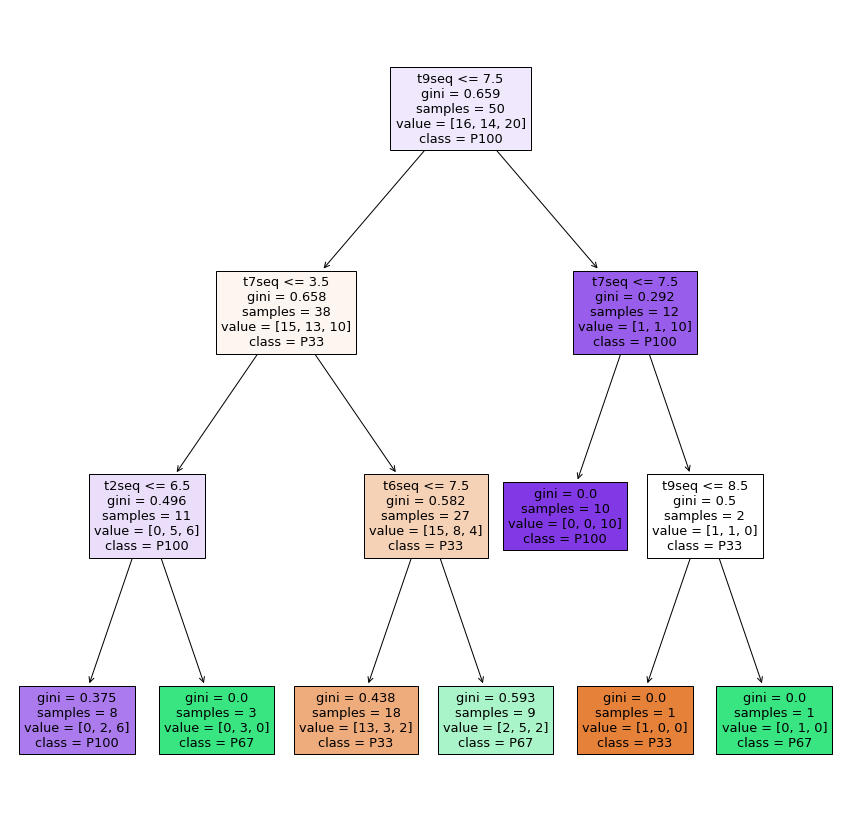

In [414]:
import numpy as np
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
#https://github.com/nok/sklearn-porter

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
feature_names = df_all.columns[36:-2]

X = df_all.iloc[:,36:-2].values
y = df_all.iloc[:,-1].values
clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names = feature_names, class_names=['P33','P67','P100'])
plt.show()

In [491]:
#clf.tree_.node_count
#dir(clf.tree_) #.children_left)
#clf.tree_.value
#x = [ np.where(sc==[i])[0][0]+1 for i in range(1,10)]
#sc,x
#clf.tree_.node_count
#n_nodes = estimator.tree_.node_count
nt = 9
domain = np.array([ [i for i in range(1, nt+1)] for i in range(nt)])
def restrict_domain(decision_tree, domain):
    initital_domain = domain.copy()
    left = decision_tree.tree_.children_left
    right = decision_tree.tree_.children_right
    feature = decision_tree.tree_.feature
    threshold = decision_tree.tree_.threshold
    value = decision_tree.tree_.value
    samples = sum(value[0][0])
    odd = np.array(list(map(lambda x: x[0][0]/(sum(x[0][1:])+1),value)))
    sam_sub = np.array(list(map(lambda x: sum(x[0])/samples,value)))
    of = odd*sam2
    node = np.where(of == of.max())[0]
    while len(node) > 0:
        #Verifica se é esquerda de alguém
        node_left = np.where(left == node[0])[0]
        #Verifica se é direita de alguém
        node_right = np.where(right == node[0])[0]
        if len(node_left)>0:
            #Se é esquerda de alguém então <=
            node = node_left
            task = feature[node[0]]
            limit = int(threshold[node[0]])
            initial_domain[task,limit:] = 0
        elif len(node_right)>0:
            #Se é direita de alguém então >= 
            node = node_right
            task = feature[node[0]]
            limit = int(threshold[node[0]])
            initial_domain[task,:limit] = 0
        else:
            node = np.array([])
    return initial_domain
        
restrict_domain(clf, domain)


#list(map(lambda x: x[0][0]*sum(x[0])/(sum(x[0][1:])*samples),value))


array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 0, 0],
       [0, 0, 0, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 0, 0]])

In [223]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names=''):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({})".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            score = threshold[0]/threshold.sum()
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    
    


def tree(t1m1, t2m1, t3m1, t4m1, t5m1, t6m1, t7m1, t8m1, t9m1, t1m2, t2m2, t3m2, t4m2, t5m2, t6m2, t7m2, t8m2, t9m2, t1m3, t2m3, t3m3, t4m3, t5m3, t6m3, t7m3, t8m3, t9m3, t1m4, t2m4, t3m4, t4m4, t5m4, t6m4, t7m4, t8m4, t9m4, t1seq, t2seq, t3seq, t4seq, t5seq, t6seq, t7seq, t8seq, t9seq)
  if t5seq <= 1.5:
    if t7seq <= 7.5:
      return [[0. 0. 6.]]
    else:  # if t7seq > 7.5
      if t8seq <= 8.0:
        return [[0. 1. 0.]]
      else:  # if t8seq > 8.0
        return [[0. 0. 1.]]
  else:  # if t5seq > 1.5
    if t4seq <= 7.5:
      if t9seq <= 8.5:
        if t8seq <= 4.5:
          if t2seq <= 2.5:
            if t8seq <= 3.0:
              return [[0. 0. 1.]]
            else:  # if t8seq > 3.0
              return [[0. 1. 0.]]
          else:  # if t2seq > 2.5
            return [[10.  0.  0.]]
        else:  # if t8seq > 4.5
          if t5seq <= 4.5:
            if t1seq <= 8.5:
              if t5seq <= 2.5:
                if t2seq <= 3.5:
                  return [[0. 0. 

In [404]:
from sklearn.tree import export_text
clf.tree_.threshold

array([ 7.5,  3.5,  6.5, -2. , -2. ,  7.5, -2. , -2. ,  7.5, -2. ,  4.5,
       -2. , -2. ])

In [197]:
df_all.iloc[:, 36:]

key,t1seq,t2seq,t3seq,t4seq,t5seq,t6seq,t7seq,t8seq,t9seq,m,class
value,5.0,3.0,8.0,7.0,9.0,6.0,4.0,1.0,2.0,54.0,0
value,6.0,3.0,4.0,5.0,7.0,2.0,9.0,1.0,8.0,57.0,0
value,1.0,9.0,5.0,3.0,8.0,6.0,7.0,4.0,2.0,58.0,0
value,5.0,8.0,1.0,4.0,3.0,2.0,6.0,9.0,7.0,58.0,0
value,8.0,9.0,3.0,6.0,4.0,5.0,7.0,1.0,2.0,58.0,0
value,1.0,5.0,4.0,3.0,7.0,9.0,6.0,8.0,2.0,58.0,0
value,2.0,8.0,9.0,1.0,3.0,4.0,6.0,7.0,5.0,58.0,0
value,5.0,9.0,8.0,1.0,4.0,3.0,6.0,2.0,7.0,58.0,0
value,5.0,9.0,4.0,1.0,2.0,6.0,8.0,3.0,7.0,59.0,0
value,1.0,8.0,9.0,6.0,5.0,3.0,2.0,4.0,7.0,59.0,0


In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    import matplotlib as mpl
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='#1f77b4' #blue
c2='green' #green
n=500

color = colorFader(c1,c2,0.5)

color

'#107c5a'

In [43]:
import seaborn as sns
sns.color_palette("RdBu", n_colors=10)

[(0.669204152249135, 0.08489042675893888, 0.16401384083044984),
 (0.8115340253748559, 0.3211072664359862, 0.2758169934640523),
 (0.9222606689734717, 0.5674740484429065, 0.4486735870818915),
 (0.9797001153402538, 0.7840830449826989, 0.6848904267589389),
 (0.9792387543252595, 0.9191080353710112, 0.8837370242214533),
 (0.9014225297962323, 0.9367935409457901, 0.956247597078047),
 (0.7324106113033451, 0.8537485582468283, 0.9162629757785468),
 (0.4814302191464823, 0.7148788927335642, 0.839446366782007),
 (0.2366013071895425, 0.5418685121107266, 0.7470203767781622),
 (0.11864667435601693, 0.37923875432525955, 0.6456747404844291)]

In [6]:
problem.plot(dict_01)

In [191]:
df

,Task,Start,Finish,Complete,Resource
0,Job A,2009-01-01,2009-02-26,23,A
1,Job B,2009-03-05,2009-04-15,55,A
2,Job C,2009-02-20 12:40:00,2009-05-30 15:12:44,97,C
3,Job D,2009-03-10,2009-04-30,11,B
4,Job E,2009-02-25,2009-06-30,14,A


In [190]:
import plotly.figure_factory as ff

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gantt_example.csv')

fig = ff.create_gantt(df, colors=['#333F44', '#93e4c1'], index_col='Complete',
                      show_colorbar=True, bar_width=0.2, showgrid_x=True, showgrid_y=True)
fig.show()


In [5]:
dict_problems = { 'Problem 01': 
                 {'tasks':5
                  , 'machines':3
                  , 'processing_time':[[5,1,2],[4,3,7],[8,1,5],[2,4,6],[9,7,3]]
                  , 'scheduling':[1,0,3,4,2]},
                 'Problem 02': 
                {'tasks':6
                 ,'machines':4
                 ,'processing_time':[
                     [25,45,52,40],
                     [7, 41, 22, 66],
                     [41, 55, 33, 21],
                     [74, 12, 24, 48],
                     [7, 15, 72, 52],
                     [12, 14, 22, 32]]
                 ,'scheduling':[1,2,3,4,5,6]},
                 'Problem 03': 
                 {'tasks':4
                  ,'machines':3
                  ,'processing_times':[ [5,4,7],[2,1,8],[9,3,6],[2,7,4]]
                  ,'scheduling':[1,2,3,4]
                 }
                }

{'Name': 'Name38522366',
 'Number of Tasks': 9,
 'Number of Machines': 3,
 'Processing Time': array([[3, 3, 7],
        [2, 4, 7],
        [2, 1, 2],
        [1, 1, 4],
        [5, 1, 1],
        [5, 2, 8],
        [4, 3, 5],
        [8, 3, 5],
        [9, 1, 8]]),
 'Start Time': array([[ 3.,  7., 14.],
        [ 1.,  3.,  7.],
        [15., 18., 34.],
        [ 0.,  1.,  2.],
        [34., 39., 49.],
        [ 6., 11., 21.],
        [11., 15., 29.],
        [26., 34., 44.],
        [17., 26., 36.]]),
 'End Time': array([[ 6., 10., 21.],
        [ 3.,  7., 14.],
        [17., 19., 36.],
        [ 1.,  2.,  6.],
        [39., 40., 50.],
        [11., 13., 29.],
        [15., 18., 34.],
        [34., 37., 49.],
        [26., 27., 44.]]),
 'Free Time': array([0., 0., 0.]),
 'Scheduling': array([4, 2, 1, 6, 7, 3, 9, 8, 5], dtype=int64),
 'Objective Function': {'Makespan': 50.0, 'Completion Time': 129.0},
 'Method': 'Brute Force',
 'Flow Shop Object': None}
{'Name': 'Name38522366',
 'Number of Tasks': 11,
 'Number of Machines': 3,
 'Processing Time': array([[7, 9, 7],
        [6, 8, 7],
        [8, 6, 6],
        [5, 6, 6],
        [5, 5, 6],
        [8, 9, 5],
        [5, 9, 6],
        [8, 7, 9],
        [7, 9, 5],
        [5, 6, 8],
        [9, 9, 9]]),
 'Start Time': array([[43., 55., 64.],
        [28., 38., 48.],
        [57., 73., 79.],
        [23., 32., 42.],
        [18., 27., 36.],
        [65., 79., 88.],
        [ 5., 11., 20.],
        [10., 20., 27.],
        [50., 64., 73.],
        [ 0.,  5., 11.],
        [34., 46., 55.]]),
 'End Time': array([[50., 64., 71.],
        [34., 46., 55.],
        [65., 79., 85.],
        [28., 38., 48.],
        [23., 32., 42.],
        [73., 88., 93.],
        [10., 20., 26.],
        [18., 27., 36.],
        [57., 73., 78.],
        [ 5., 11., 19.],
        [43., 55., 64.]]),
 'Free Time': array([0., 0., 0.]),
 'Scheduling': array([10,  7,  8,  5,  4,  2, 11,  1,  9,  3,  6], dtype=int64),
 'Objective Function': {'Makespan': 93.0, 'Completion Time': 254.0},
 'Method': 'Brute Force',
 'Flow Shop Object': None}
{'Name': 'Name38522366',
 'Number of Tasks': 9,
 'Number of Machines': 4,
 'Processing Time': array([[3, 3, 7, 2],
        [4, 7, 2, 1],
        [2, 1, 1, 4],
        [5, 1, 1, 5],
        [2, 8, 4, 3],
        [5, 8, 3, 5],
        [9, 1, 8, 4],
        [5, 7, 2, 6],
        [7, 3, 2, 9]]),
 'Start Time': array([[11., 15., 18., 28.],
        [38., 42., 49., 51.],
        [ 0.,  2.,  3.,  4.],
        [24., 34., 37., 42.],
        [ 2.,  4., 12., 16.],
        [19., 26., 34., 37.],
        [29., 38., 39., 47.],
        [14., 19., 26., 30.],
        [ 4., 12., 16., 19.]]),
 'End Time': array([[14., 18., 25., 30.],
        [42., 49., 51., 52.],
        [ 2.,  3.,  4.,  8.],
        [29., 35., 38., 47.],
        [ 4., 12., 16., 19.],
        [24., 34., 37., 42.],
        [38., 39., 47., 51.],
        [19., 26., 28., 36.],
        [11., 15., 18., 28.]]),
 'Free Time': array([0., 0., 0., 0.]),
 'Scheduling': array([3, 5, 9, 1, 8, 6, 4, 7, 2], dtype=int64),
 'Objective Function': {'Makespan': 52.0, 'Completion Time': 194.0},
 'Method': 'Brute Force',
 'Flow Shop Object': <__main__.FlowShopPermutational at 0x235d510b548>}

In [ ]:
class container():
    def __init__(self, width, height, grid):
        self.width = width
        self.height = height
        self.grid = np.zeros(width)
        

In [2]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])